# Shamstabrez Alam

# TASK-6

# Stock Market Prediction using Numerical and Textual Analysis

 The task is to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.



Download historical stock prices from https://finance.yahoo.com/

 Download textual (news) data from https://bit.ly/36fFPI6

# Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

# Loading Textual (News) data

In [2]:
ndf = pd.read_csv("india-news-headlines.csv")


In [3]:
ndf.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [4]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


# Data Pre-processing

In [5]:
ndf['published_date'] = np.array([str(str(str(x)[:4]) + '/' + str(str(x)[4:6]) + '/' + str(str(x)[6:])) for x in ndf['publish_date']])


In [6]:
ndf.head()

,publish_date,headline_category,headline_text,published_date
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,20010102,unknown,America's unwanted heading for India?,2001/01/02
4,20010102,unknown,For bigwigs; it is destination Goa,2001/01/02


In [7]:
del ndf["publish_date"]


In [8]:
ndf.head()

,headline_category,headline_text,published_date
0,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,unknown,America's unwanted heading for India?,2001/01/02
4,unknown,For bigwigs; it is destination Goa,2001/01/02


In [9]:
ndf['published_date'] = pd.to_datetime(ndf['published_date'])

In [10]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   headline_category  object        
 1   headline_text      object        
 2   published_date     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [11]:
ndf = ndf[['published_date', 'headline_text']]

In [12]:
ndf.columns = ['published_date', 'headline']

In [13]:
ndf.head()

,published_date,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


## Headlines having same dates

In [14]:
dict_news = {}

In [15]:
t1 = ndf.loc[0, 'published_date']
t2 = str(ndf.loc[0, 'headline'])
for x in range(1, len(ndf)):
    if ndf.loc[x, 'published_date']==t1:
        t2 += '. ' + str(ndf.loc[x, 'headline'])
    else:
        dict_news[ndf.loc[x-1, 'published_date']] = t2
        t2 = ""
        t1 = ndf.loc[x, 'published_date']

In [16]:
#len(dict_news)

In [17]:
indexes = np.arange(0, len(dict_news))

In [18]:
df_news = pd.DataFrame(indexes)
df_news['Published_Date'] = dict_news.keys()

In [19]:
df_news.head()

,0,Published_Date
0,0,2001-01-01
1,1,2001-01-02
2,2,2001-01-03
3,3,2001-01-04
4,4,2001-01-05


In [20]:
l = []
for i in dict_news.keys():
    l.append(dict_news[i])

In [21]:
l[0]

'win over cena satisfying but defeating undertaker bigger roman reigns'

In [22]:
df_news['Headline'] = np.array(l)

In [23]:
df_news.head()

,0,Published_Date,Headline
0,0,2001-01-01,win over cena satisfying but defeating underta...
1,1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...
2,2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...
3,3,2001-01-04,. Vajpayee gives big push to tech education; R...
4,4,2001-01-05,. Hawkings' day out. Light combat craft takes ...


In [24]:
del df_news[0]

In [25]:
df_news.head()

,Published_Date,Headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...
3,2001-01-04,. Vajpayee gives big push to tech education; R...
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...


# Sentiment Analysis

In [27]:
from textblob import TextBlob
polarity = []
subjectivity = []
tuples = []
for i in df_news['Headline'].values:
    my_valence = TextBlob(i)
    tuples.append(my_valence.sentiment)

In [ ]:
##from text.blob import TextBlob

In [ ]:
#from textblob import TextBlob, Word, Blobber

In [ ]:
 pip install -U git+https://github.com/sloria/TextBlob.git@dev

In [28]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [29]:
df_news['Polarity'] = np.array(polarity)
df_news['Subjectivity'] = np.array(subjectivity)

In [30]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984


In [31]:
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(df_news)):
    pol = df_news.iloc[i]['Polarity']
    sub = df_news.iloc[i]['Subjectivity']
    if pol>=0:
        if pol>=0.2:
            polarity.append(temp[0])
        else:
            polarity.append(temp[2])
    else:
        if pol<=-0.2:
            polarity.append(temp[1])
        else:
            polarity.append(temp[2])
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])

In [32]:
df_news['Sentiment'] = polarity
df_news['Opinion'] = subjectivity

In [33]:
df_news.head()

,Published_Date,Headline,Polarity,Subjectivity,Sentiment,Opinion
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public


In [34]:
df_news.tail()

,Published_Date,Headline,Polarity,Subjectivity,Sentiment,Opinion
7074,2020-06-25,. Telangana: Senior Congress leader tests+ve f...,0.026626,0.403808,Neutral,Public
7075,2020-06-26,. up hammers out 60k proposals of rs 870cr ahe...,0.067991,0.381251,Neutral,Factual
7076,2020-06-27,. Major Ravi to helm movie on Indo-Chinese con...,0.079290,0.398808,Neutral,Factual
7077,2020-06-28,. Sports without spectators: 'Who will cheer f...,0.056252,0.401576,Neutral,Public
7078,2020-06-29,. Anna Eden gets creative with husband and MP ...,0.059637,0.392916,Neutral,Factual


In [35]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079 entries, 0 to 7078
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Published_Date  7079 non-null   datetime64[ns]
 1   Headline        7079 non-null   object        
 2   Polarity        7079 non-null   float64       
 3   Subjectivity    7079 non-null   float64       
 4   Sentiment       7079 non-null   object        
 5   Opinion         7079 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 332.0+ KB


# Visualization of Distributed Sentiments

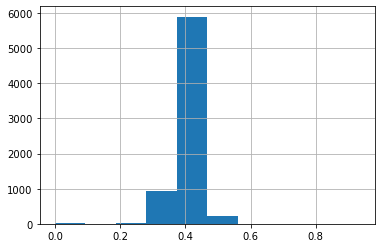

In [36]:
#Histogram Subjectivity
plt.figure(figsize=(6,4))
df_news['Subjectivity'].hist()
plt.show()

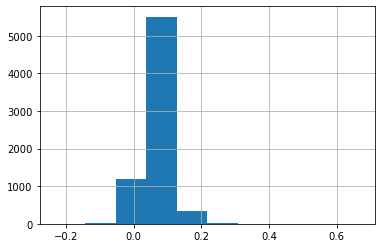

In [37]:
#histogram Polarity
plt.figure(figsize=(6,4))
df_news['Polarity'].hist()
plt.show()

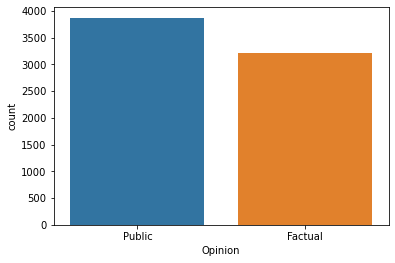

In [38]:
#countplot
sns.countplot(df_news['Opinion'])

# Loading Historical Stock Price Data

In [40]:
sdf = pd.read_csv('BSESN.csv')

In [41]:
sdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-10,36258.000000,36269.308594,36070.761719,36106.500000,36106.500000,17331500.0
1,2019-01-11,36191.871094,36214.261719,35840.601563,36009.839844,36009.839844,18100.0
2,2019-01-14,36113.269531,36124.941406,35691.750000,35853.558594,35853.558594,24100.0
3,2019-01-15,35950.078125,36349.308594,35950.078125,36318.328125,36318.328125,24000.0
4,2019-01-16,36370.738281,36462.031250,36278.609375,36321.289063,36321.289063,16400.0


In [42]:
sdf.shape

(439, 7)

In [43]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       439 non-null    object 
 1   Open       437 non-null    float64
 2   High       437 non-null    float64
 3   Low        437 non-null    float64
 4   Close      437 non-null    float64
 5   Adj Close  437 non-null    float64
 6   Volume     437 non-null    float64
dtypes: float64(6), object(1)
memory usage: 24.1+ KB


In [44]:
sdf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,437.000000,437.000000,437.000000,437.000000,437.000000,4.370000e+02
mean,37601.877941,37819.775377,37272.648549,37534.149631,37534.149631,3.222979e+05
std,3115.923805,3003.167759,3232.524370,3119.733197,3119.733197,2.462952e+06
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,2.800000e+03
25%,36417.578125,36622.769531,36170.800781,36395.031250,36395.031250,1.480000e+04
50%,38283.898438,38475.929688,37952.101563,38182.078125,38182.078125,1.860000e+04
75%,39679.351563,39838.488281,39423.269531,39683.289063,39683.289063,2.540000e+04
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,3.181510e+07


In [45]:
sdf['hl_pct']=((sdf['High']-sdf['Low'])/sdf['Low'])*100
sdf['pct_change']=((sdf['Close']-sdf['Open'])/sdf['Open'])*100

In [46]:
sdf = sdf.drop(['Open','High','Close','Low'], axis=1)

In [47]:
sdf.head()

,Date,Adj Close,Volume,hl_pct,pct_change
0,2019-01-10,36106.500000,17331500.0,0.550437,-0.417839
1,2019-01-11,36009.839844,18100.0,1.042561,-0.502962
2,2019-01-14,35853.558594,24100.0,1.213702,-0.719157
3,2019-01-15,36318.328125,24000.0,1.110513,1.024337
4,2019-01-16,36321.289063,16400.0,0.505592,-0.135959


In [48]:
sdf['Date'] = pd.to_datetime(sdf['Date'])

In [49]:
sdf.head()

,Date,Adj Close,Volume,hl_pct,pct_change
0,2019-01-10,36106.500000,17331500.0,0.550437,-0.417839
1,2019-01-11,36009.839844,18100.0,1.042561,-0.502962
2,2019-01-14,35853.558594,24100.0,1.213702,-0.719157
3,2019-01-15,36318.328125,24000.0,1.110513,1.024337
4,2019-01-16,36321.289063,16400.0,0.505592,-0.135959


In [50]:
sdf = sdf.dropna()
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 438
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        437 non-null    datetime64[ns]
 1   Adj Close   437 non-null    float64       
 2   Volume      437 non-null    float64       
 3   hl_pct      437 non-null    float64       
 4   pct_change  437 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 20.5 KB


In [51]:
df_news.columns = ['Date', 'Headline', 'Polarity', 'Subjectivity', 'Sentiment', 'Opinion']

# Merging the News and Stocks Datasets on the basis of Dates

In [52]:
mdf = df_news.merge(sdf, how='inner', on='Date', left_index = True)

In [53]:
mdf.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,hl_pct,pct_change
0,2019-01-10,. Dubbing boom has voice actors make hay. This...,0.067545,0.377127,Neutral,Factual,36106.500000,17331500.0,0.550437,-0.417839
1,2019-01-11,. Punjab Agro to export 200 MT kinnow to UAE. ...,0.042883,0.388607,Neutral,Factual,36009.839844,18100.0,1.042561,-0.502962
2,2019-01-14,. makar sankranti quotes wishes messages image...,0.087006,0.381616,Neutral,Factual,35853.558594,24100.0,1.213702,-0.719157
3,2019-01-15,. City colleges find space to grow veggies; fr...,0.071534,0.394132,Neutral,Factual,36318.328125,24000.0,1.110513,1.024337
4,2019-01-16,. BSSS students do Nukkad Natak for road safet...,0.039724,0.398775,Neutral,Factual,36321.289063,16400.0,0.505592,-0.135959


In [54]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 356
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          355 non-null    datetime64[ns]
 1   Headline      355 non-null    object        
 2   Polarity      355 non-null    float64       
 3   Subjectivity  355 non-null    float64       
 4   Sentiment     355 non-null    object        
 5   Opinion       355 non-null    object        
 6   Adj Close     355 non-null    float64       
 7   Volume        355 non-null    float64       
 8   hl_pct        355 non-null    float64       
 9   pct_change    355 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 30.5+ KB


## Required Column

In [55]:
req_df = mdf[['Date', 'Polarity', 'Subjectivity','Adj Close','hl_pct','pct_change']]
req_df.head()

,Date,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
0,2019-01-10,0.067545,0.377127,36106.500000,0.550437,-0.417839
1,2019-01-11,0.042883,0.388607,36009.839844,1.042561,-0.502962
2,2019-01-14,0.087006,0.381616,35853.558594,1.213702,-0.719157
3,2019-01-15,0.071534,0.394132,36318.328125,1.110513,1.024337
4,2019-01-16,0.039724,0.398775,36321.289063,0.505592,-0.135959


In [56]:
req_df = req_df.set_index('Date')

In [57]:
req_df.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
Date,,,,,
2019-01-10,0.067545,0.377127,36106.500000,0.550437,-0.417839
2019-01-11,0.042883,0.388607,36009.839844,1.042561,-0.502962
2019-01-14,0.087006,0.381616,35853.558594,1.213702,-0.719157
2019-01-15,0.071534,0.394132,36318.328125,1.110513,1.024337
2019-01-16,0.039724,0.398775,36321.289063,0.505592,-0.135959


# Feature Scaling using MinMaxScaler

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(req_df))
df1.columns = req_df.columns
df1.index=req_df.index
df1.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
Date,,,,,
2019-01-10,0.609856,0.286760,0.633962,0.013742,0.396686
2019-01-11,0.406990,0.382314,0.627910,0.041075,0.391377
2019-01-14,0.769937,0.324125,0.618125,0.050580,0.377895
2019-01-15,0.642668,0.428304,0.647225,0.044849,0.486623
2019-01-16,0.381008,0.466959,0.647411,0.011252,0.414264


In [60]:
train = df1[: int(0.7*(len(df1)))]  #70 percent
test = df1[int(0.7*(len(df1))):]    #30 percent

In [61]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog = train)
fitted = model.fit()

## Predicted vs Test

In [63]:
pred = fitted.forecast(fitted.y, steps=len(test))
predicted = pd.DataFrame(pred, columns=df1.columns)

In [67]:
predicted.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
0,0.494020,0.481319,0.983922,0.053278,0.430924
1,0.466430,0.458304,0.984770,0.034545,0.407901
2,0.446641,0.453462,0.982860,0.032005,0.405571
3,0.443066,0.454000,0.980834,0.031926,0.405612
4,0.442947,0.454750,0.978866,0.032070,0.405737


In [65]:
test.head()

,Polarity,Subjectivity,Adj Close,hl_pct,pct_change
Date,,,,,
2020-01-21,0.451137,0.211290,0.960628,0.015221,0.398127
2020-01-22,0.191356,0.191438,0.947578,0.047187,0.369843
2020-01-23,0.757828,0.177150,0.964547,0.025746,0.452250
2020-01-24,0.567372,0.705197,0.978747,0.039878,0.458335
2020-01-27,0.746935,0.679697,0.950066,0.036356,0.369327


Checking the accuracy

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predicted['Adj Close'], test['Adj Close']))

0.4664311281584297